<a href="https://colab.research.google.com/github/ishar-machrizzandi/ishar-machrizzandi.github.io/blob/main/Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Akurasi: 0.7293233082706767

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        72
           1       0.71      0.69      0.70        61

    accuracy                           0.73       133
   macro avg       0.73      0.73      0.73       133
weighted avg       0.73      0.73      0.73       133



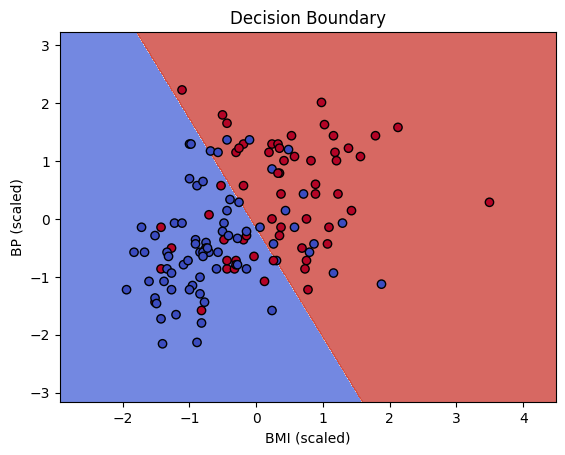

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset and convert to DataFrame
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Menambahkan target ke DataFrame
df['target'] = data.target

# Mengubah target menjadi klasifikasi biner
# Misalnya, target > 140 dianggap kelas 1, lainnya kelas 0
df['target_class'] = (df['target'] > 140).astype(int)

# Memilih dua fitur untuk visualisasi (misal, 'bmi' dan 'bp')
X = df[['bmi', 'bp']].values
y = df['target_class'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi data agar model lebih stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    # Menentukan batas plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prediksi nilai setiap titik pada grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('BMI (scaled)')
    plt.ylabel('BP (scaled)')
    plt.show()

# Visualisasi menggunakan data uji
plot_decision_boundary(X_test, y_test, model)


In [ ]:
df.shape

(442, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           442 non-null    float64
 1   sex           442 non-null    float64
 2   bmi           442 non-null    float64
 3   bp            442 non-null    float64
 4   s1            442 non-null    float64
 5   s2            442 non-null    float64
 6   s3            442 non-null    float64
 7   s4            442 non-null    float64
 8   s5            442 non-null    float64
 9   s6            442 non-null    float64
 10  target        442 non-null    float64
 11  target_class  442 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 41.6 KB


In [ ]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target_class
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0,0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0,0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0,0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0,0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0,1
